<a href="https://colab.research.google.com/github/AntonioFialhoSN/Rede-Neurais-Avalia-o-P3-Parte1/blob/main/Rede_Neurais_Avalia%C3%A7%C3%A3o_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados (AED)

In [2]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

# Survival (Sobrevivência):0 = Não 1 = Sim

# Pclass (Classe do passageiro): Proxy para status socioeconômico (NSE) 1ª = Classe alta 2ª = Classe média 3ª = Classe baixa

# sibsp (Número de irmãos/cônjuges a bordo): Irmãos = irmão, irmã, meio-irmão, meia-irmã Cônjuge = marido, esposa (amantes e noivos foram ignorados)

# parch (Número de pais/filhos a bordo): Pais = mãe, pai Filhos = filha, filho, enteada, enteado Algumas crianças viajaram apenas com babá, portanto parch=0 para elas.

# Ticket (Número do bilhete): Número do bilhete

# Fare (Tarifa): Valor pago pela passagem

# Cabin (Cabine):Número da cabine

# Embarked (Porto de embarque): C = Cherbourg Q = Queenstown S = Southampton

# Name (Nome), Sex (Sexo), Age (Idade): Autoexplicativos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
survival_rate = df['Survived'].mean()
print(f"Taxa geral de sobrevivência: {survival_rate:.2%}")

Taxa geral de sobrevivência: 38.38%


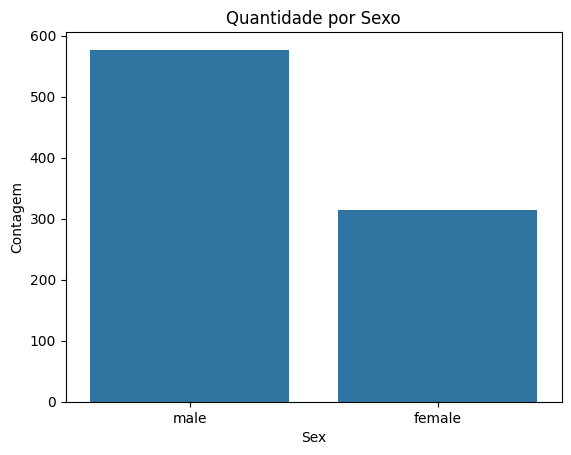

In [7]:
sns.countplot(x='Sex', data=df)
plt.title('Quantidade por Sexo')
plt.ylabel('Contagem')
plt.show()

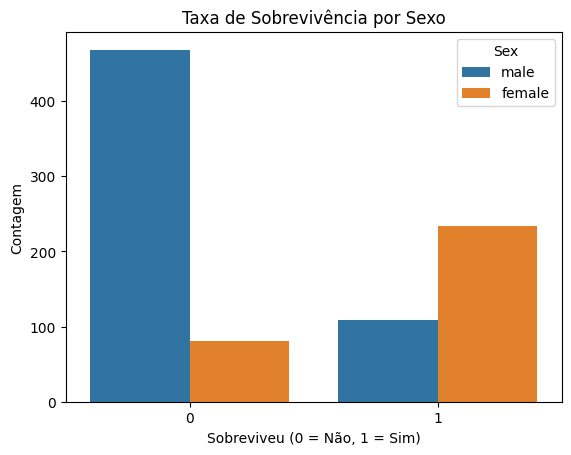

In [8]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Taxa de Sobrevivência por Sexo')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()

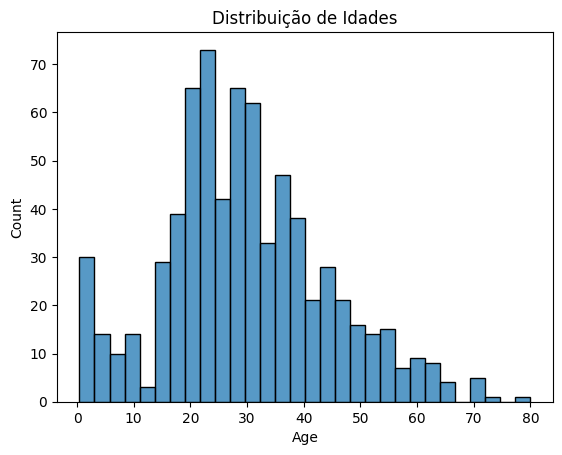

In [9]:
sns.histplot(df['Age'].dropna(), bins=30)
plt.title('Distribuição de Idades')
plt.show()

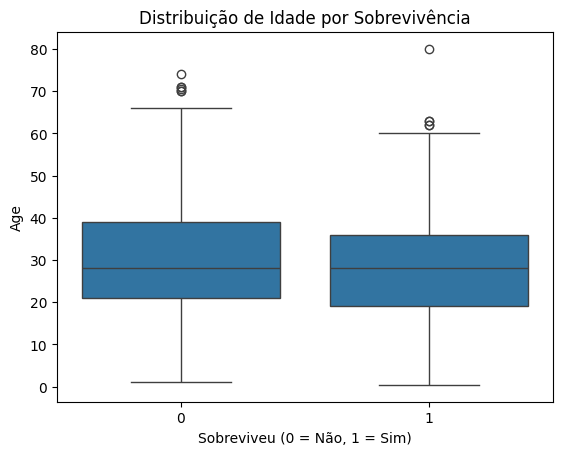

In [10]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Distribuição de Idade por Sobrevivência')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.show()

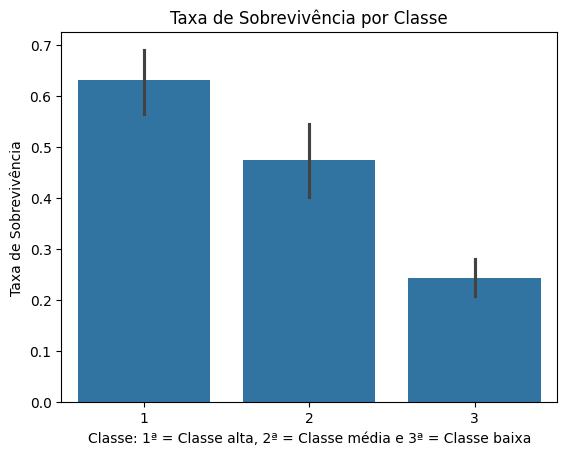

In [11]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Taxa de Sobrevivência por Classe')
plt.xlabel('Classe: 1ª = Classe alta, 2ª = Classe média e 3ª = Classe baixa')
plt.ylabel('Taxa de Sobrevivência')
plt.show()

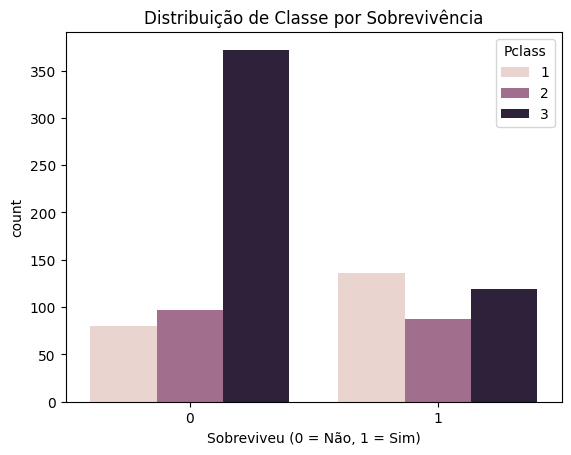

In [12]:
sns.countplot(x="Survived", hue = 'Pclass', data=df)
plt.title('Distribuição de Classe por Sobrevivência')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.show()

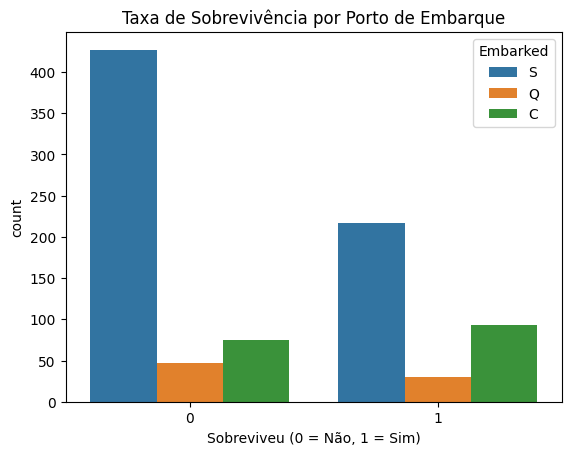

In [13]:
sns.countplot(x='Survived', hue = 'Embarked', data = df)
plt.title('Taxa de Sobrevivência por Porto de Embarque')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.show()
# Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

## Limpeza de Dados

In [14]:
total_duplicados = df.duplicated().sum()
print(f"Total de linhas duplicadas: {total_duplicados}")

Total de linhas duplicadas: 0


In [15]:
total_valores_faltantes = df.isnull().sum()
print(f"Total de valores faltantes por coluna:\n{total_valores_faltantes}")

Total de valores faltantes por coluna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [16]:
df_1 = df
df_1['Sex'] = df_1['Sex'].map({'male': 0, 'female': 1})
df_1 = df_1.drop(['PassengerId', 'Cabin'], axis=1)
df_2 = df_1
df_2['Embarked'] = df_2['Embarked'].fillna('S')
df_2['Embarked'] = df_2['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_2 = df_2.drop(['Ticket'], axis=1)

df_2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2


In [17]:
df_2['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

/tmp/ipython-input-18-3034418037.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title_counts.index, y=title_counts.values, palette='viridis')


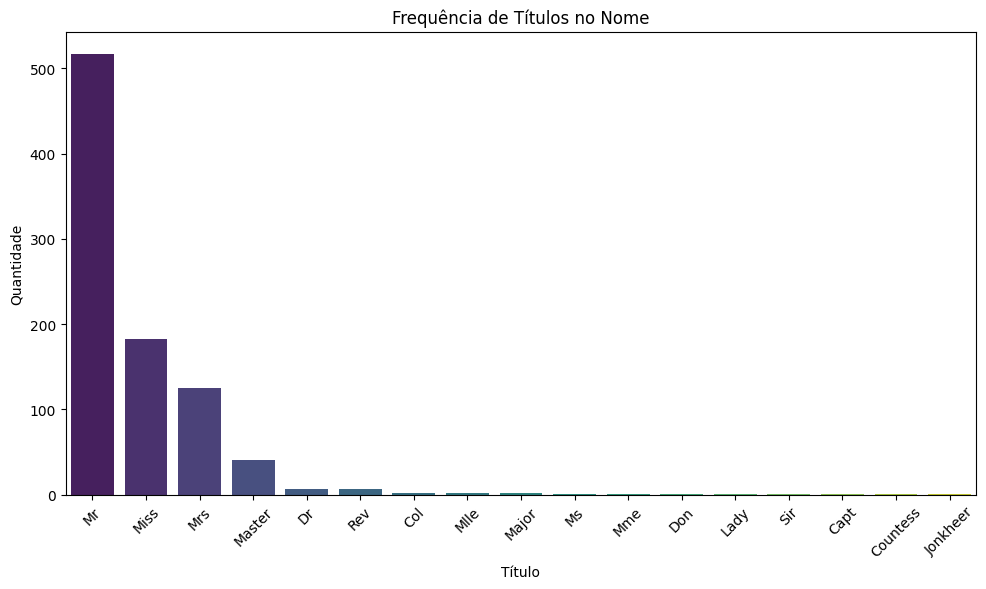

In [18]:
df_2['Title'] = df_2['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Contagem dos títulos
title_counts = df_2['Title'].value_counts()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=title_counts.index, y=title_counts.values, palette='viridis')
plt.xlabel('Título')
plt.ylabel('Quantidade')
plt.title('Frequência de Títulos no Nome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
least_occuring = ['Don', 'Rev', 'Dr', 'Mme', 'Ms',
                  'Major', 'Lady', 'Sir', 'Mlle', 'Col',
                  'Capt', 'Countess', 'Jonkheer']

df_2['Title'] = df_2['Title'].replace(least_occuring, 'Rare')

In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df_2['Title'] = df_2['Title'].map(title_mapping)
df_2.drop('Name', axis=1, inplace=True)

In [21]:
df_2['Title'].unique()

array([1, 3, 2, 4, 5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


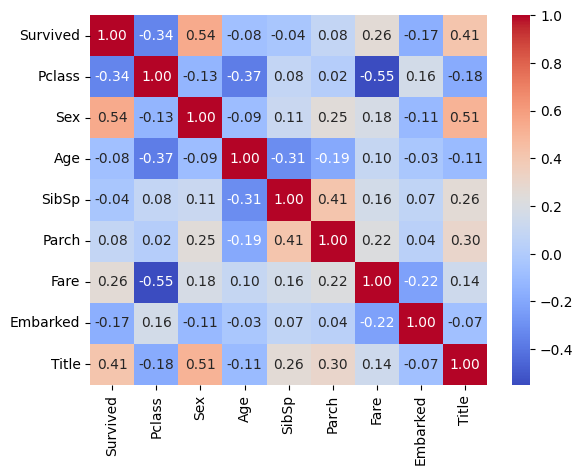

In [22]:
df_2.info()
corr_train = df_2.corr()
sns.heatmap(corr_train, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [23]:
df_3 = df_2
df_3['Age'] = df_3['Age'].fillna(df_3['Age'].mean())
df_3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,2,1
1,1,1,1,38.0,1,0,71.2833,0,3
2,1,3,1,26.0,0,0,7.9250,2,2
3,1,1,1,35.0,1,0,53.1000,2,3
4,0,3,0,35.0,0,0,8.0500,2,1


#Normalização de Dados



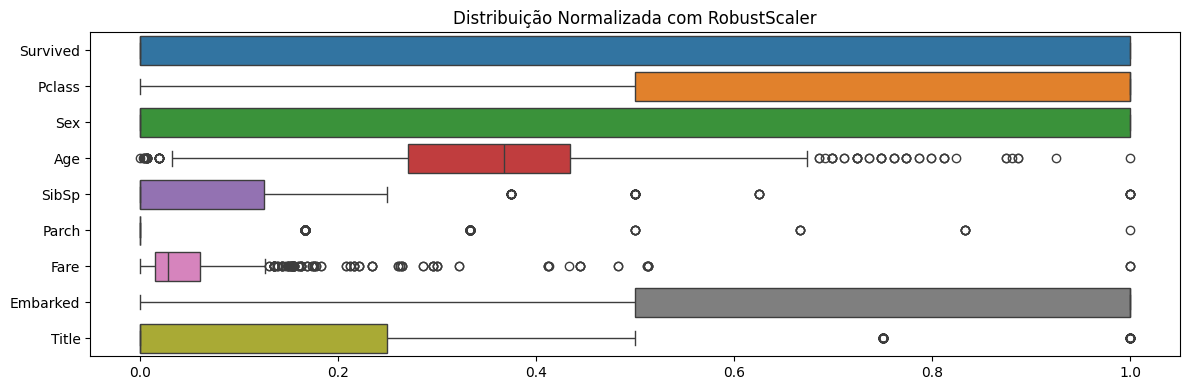

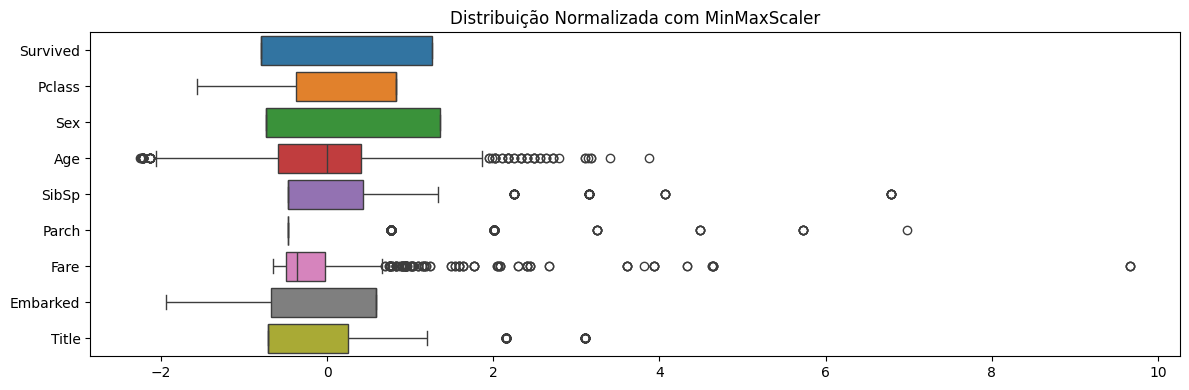

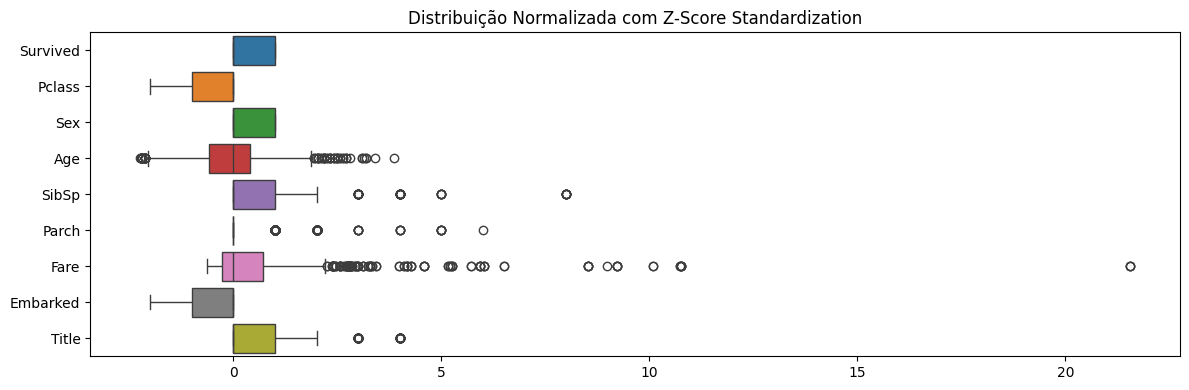

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# Instanciar o scaler
scaler_minmax = MinMaxScaler()

scaler_zscore = StandardScaler()

scaler_robust = RobustScaler()



# Aplicar o RobustScaler em todas as colunas numéricas do df_2
df_3_scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_3), columns=df_3.columns)

# Aplicar o MinMaxScaler em todas as colunas numéricas do df_2
df_3_scaled_zscore = pd.DataFrame(scaler_zscore.fit_transform(df_3), columns=df_3.columns)

# Aplicar o StandardScaler em todas as colunas numéricas do df_2
df_3_scaled_robust = pd.DataFrame(scaler_robust.fit_transform(df_3), columns=df_3.columns)

# Plotar o boxplot dos dados escalonados
plt.figure(figsize=(12, 4))
sns.boxplot(data=df_3_scaled_minmax, orient='h')
plt.title("Distribuição Normalizada com RobustScaler")
plt.tight_layout()

plt.figure(figsize=(12, 4))
sns.boxplot(data=df_3_scaled_zscore, orient='h')
plt.title("Distribuição Normalizada com MinMaxScaler")
plt.tight_layout()

plt.figure(figsize=(12, 4))
sns.boxplot(data=df_3_scaled_robust, orient='h')
plt.title("Distribuição Normalizada com Z-Score Standardization")
plt.tight_layout()
plt.show()

#Redes Neurais
